<a href="https://colab.research.google.com/github/AryaPratamaPutra-10/Analys_Data_Lele/blob/main/Analisis%20Lele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import get_ipython
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# atau algoritma lain seperti RandomForestRegressor, SVR, dll.
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import pandas as pd

# Correct URL to access the raw data on GitHub
data = pd.read_csv ('https://raw.githubusercontent.com/AryaPratamaPutra-10/Analys_Data_Lele/1ceadbc02bb52457cabc99b081ef6cffd5c1ae25/Data_Lele.csv',
sep=';')

data.info()
# Menampilkan semua baris
#pd.set_option('display.max_rows', None)

# Menampilkan semua kolom
#pd.set_option('display.max_columns', None)

# Menampilkan lebar kolom agar muat
#pd.set_option('display.width', None)

# Sekarang, data.head() akan menampilkan semua data
# To display the first few rows of the dataset:
# print(df.head())  # Default shows the first 5 rows
# print(df.head(10))  # To show the first 10 rows

# To display the last few rows of the dataset:
# print(df.tail())  # Default shows the last 5 rows
# print(df.tail(10))  # To show the last 10 rows
# data_long = pd.melt(data, id_vars=['Provinsi', 'Kabupaten/Kota', 'Jenis_Ikan', 'Tahun'],
                    #var_name='Variabel', value_name='Nilai')
# To display a random sample of rows:
#print(df.sample(5))  # Show 5 random rows
#display(df.style.set_properties(**{'text-align': 'left'}))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Provinsi                                  500 non-null    object 
 1   Kabupaten/Kota                            500 non-null    object 
 2   Jenis_Ikan                                500 non-null    object 
 3   Tahun                                     500 non-null    int64  
 4   Volume_Produksi                           500 non-null    object 
 5   Nilai_Produksi                            500 non-null    object 
 6   Harga_Lele                                500 non-null    object 
 7                                             0 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 31.4+ KB


In [ ]:
data.isnull().sum()

,0
Provinsi,0
Kabupaten/Kota,0
Jenis_Ikan,0
Tahun,0
Volume_Produksi,0
Nilai_Produksi,0
Harga_Lele,0
,500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                       --------------  ----- 
 0   Provinsi;Kabupaten/Kota;Jenis_Ikan;Tahun;Volume_Produksi;Nilai_Produksi;Harga_Lele;                                          500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


,Provinsi;Kabupaten/Kota;Jenis_Ikan;Tahun;Volume_Produksi;Nilai_Produksi;Harga_Lele;
count,500
unique,500
top,JAWA BARAT;BANDUNG;LELE;2019;5.372.785 ; Rp85....
freq,1


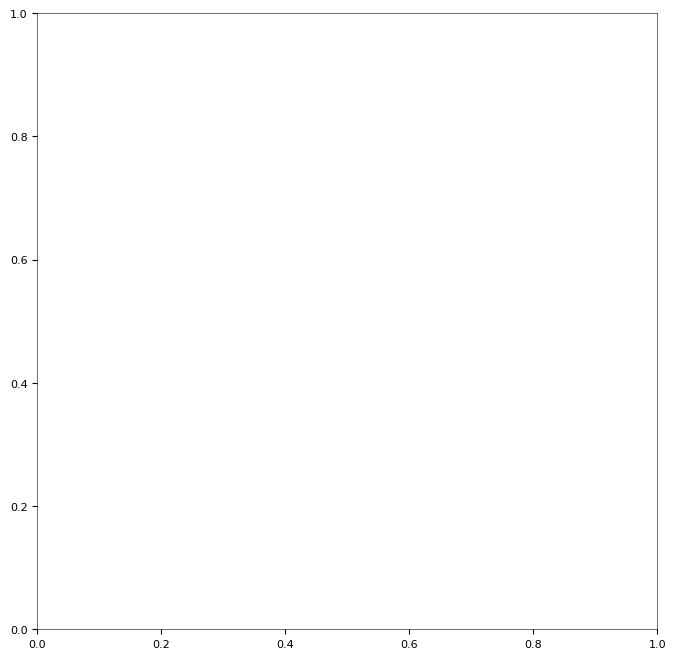

In [ ]:
df.describe()

In [ ]:
data_long = pd.melt(data, id_vars=['Provinsi', 'Kabupaten/Kota', 'Jenis_Ikan', 'Tahun'],
                    var_name='Variabel', value_name='Nilai')




data_wide = data_long.pivot(index=['Provinsi', 'Kabupaten/Kota', 'Jenis_Ikan', 'Tahun'],
                            columns='Variabel', values='Nilai').reset_index()

In [ ]:
import plotly.express as px

# Convert 'Volume_Produksi' column to numeric, handling potential errors
data["Volume_Produksi"] = pd.to_numeric(data["Volume_Produksi"], errors='coerce')

fig = px.scatter(data, x="Volume_Produksi", y="Nilai_Produksi", size="Volume_Produksi")
fig.show()

<ipython-input-42-0d9eccbc01a2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Convert 'Volume_Produksi' column to numeric, handling potential errors
data["Volume_Produksi"] = pd.to_numeric(data["Volume_Produksi"], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate and print the correlation matrix
print(numeric_data.corr())

                                             Tahun  Volume_Produksi  \
Tahun                                     1.000000        -0.016463   
Volume_Produksi                          -0.016463         1.000000   
                                               NaN              NaN   

                                                                                    
Tahun                                                                          NaN  
Volume_Produksi                                                                NaN  
                                                                               NaN  


<ipython-input-44-67656acdbae3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd

# Assuming 'data' is your dictionary
data = pd.DataFrame(data)  # Convert the dictionary to a Pandas DataFrame

# Now you can use isnull()
data.isnull().sum()

,0
Provinsi,0


One hot encoding

In [ ]:
import pandas as pd

# Define 'data' as a dictionary with key-value pairs
data = {'Provinsi': ['JAWA TIMUR', 'JAWA BARAT', 'JAWA TENGAH']}
df = pd.DataFrame(data)

# one-hot encoding using pandas
encoded_df = pd.get_dummies(df, columns=['Provinsi'])

# display results
print(encoded_df)

   Provinsi_JAWA BARAT  Provinsi_JAWA TENGAH  Provinsi_JAWA TIMUR
0                False                 False                 True
1                 True                 False                False
2                False                  True                False


In [ ]:
# Asumsikan 'df_lain' adalah DataFrame yang berisi data lain
df_gabungan = pd.concat([encoded_df, df_lain], axis=1)

NameError: name 'df_lain' is not defined